<a href="https://colab.research.google.com/github/ipgub/TIF456/blob/main/nb/2025_CV_W09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FFT of Images

Initialisation

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
import sys
import matplotlib.pyplot as plt

# Additional library
import urllib.request

In [ ]:
# Images library
imgurl00 = 'https://i.ibb.co/KX1kr37/5-3-01.png'        # male - Grayscale
imgurl01 = 'https://i.ibb.co/FXYXVhb/4-1-01.png'        # female - RGB
imgurl02 = 'https://i.ibb.co/gRSp54R/pepperlut.jpg'     # underexposed img of pepper - Grayscale
imgurl03 = 'https://i.ibb.co/K0mPdBP/pepper.jpg'        # overexposed img of pepper - RGB
imgurl04 = 'https://i.ibb.co/KVSdcwL/lena-dark.png'     # Lena dark (underexposed) version - Grayscale
imgurl05 = 'https://i.ibb.co/hBpSQRx/scenery-flat.jpg'  # Scenery (unequalized) version - RGB

imglib = [
  imgurl00,
  imgurl01,
  imgurl02,
  imgurl03,
  imgurl04,
  imgurl05,
]

In [ ]:
requests = [urllib.request.urlopen(p) for p in imglib]
arrimgdata = [np.asarray(bytearray(req.read()), dtype = np.uint8) for req in requests]
testImg = [cv2.imdecode(arr,-1) for arr in arrimgdata]
for img in testImg:
  if img is None:
    print('Could not open image file')
    sys.exit()

In [ ]:
# Select particular image
myImage = testImg[0]

Function definition for FFT computation

In [ ]:
def compute_fft(image, vis=True):
  # compute the FFT to find the frequency transform, then shift
	# the zero frequency component (i.e., DC component located at
	# the top-left corner) to the center where it will be more
	# easy to analyze
  fft = np.fft.fft2(image)
  fftShift = np.fft.fftshift(fft)

  # check to see if we are visualizing our output
  if vis:
		# compute the magnitude spectrum of the transform
    magnitude = 20 * np.log(np.abs(fftShift))

		# display the original input image
    (fig, ax) = plt.subplots(1, 2, )
    ax[0].imshow(image, cmap="gray")
    ax[0].set_title("Input")
    ax[0].set_xticks([])
    ax[0].set_yticks([])

		# display the magnitude image
    ax[1].imshow(magnitude, cmap="gray")
    ax[1].set_title("Magnitude Spectrum")
    ax[1].set_xticks([])
    ax[1].set_yticks([])

		# show our plots
    plt.show()



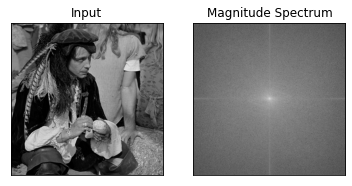

In [ ]:
compute_fft(myImage)

In [ ]:
def detect_blur_fft(image, size=60, thresh=10, vis=True):
  # grab the dimension of the image and use the dimension to derive
  # the center (x,y) coordinates
  (h,w) = image.shape
  (cX, cY) = ( int(w/2.0), int(h/2.0))

  # compute the FFT to find the frequency transform, then shift
	# the zero frequency component (i.e., DC component located at
	# the top-left corner) to the center where it will be more
	# easy to analyze
  fft = np.fft.fft2(image)
  fftShift = np.fft.fftshift(fft)

  # check to see if we are visualizing our output
  if vis:
		# compute the magnitude spectrum of the transform
    magnitude = 20 * np.log(np.abs(fftShift))

		# display the original input image
    (fig, ax) = plt.subplots(1, 2, )
    ax[0].imshow(image, cmap="gray")
    ax[0].set_title("Input")
    ax[0].set_xticks([])
    ax[0].set_yticks([])

		# display the magnitude image
    ax[1].imshow(magnitude, cmap="gray")
    ax[1].set_title("Magnitude Spectrum")
    ax[1].set_xticks([])
    ax[1].set_yticks([])

		# show our plots
    plt.show()

  # zero-out the center of the FFT shift (i.e., remove low
	# frequencies)
  fftShift[cY - size:cY + size, cX - size:cX + size] = 0

  # apply the inverse shift such that the DC
	# component once again becomes the top-left
  i_fftShift = np.fft.ifftshift(fftShift)

	# apply the inverse FFT
  recon = np.fft.ifft2(i_fftShift)

  img_back = np.real(recon)

  # compute the magnitude spectrum of the reconstructed image,
  # then compute the mean of the magnitude values
  magnitude = 20 * np.log(np.abs(recon))
  mean = np.mean(magnitude)

  if vis:
    # magnitude of the shifted spectrum
    filt_magnitude = 20 * np.log(np.abs(fftShift))

    # display the reconstructed image
    (fig, ax) = plt.subplots(1, 2, )
    ax[0].imshow(img_back, cmap="gray")
    ax[0].set_title("Output")
    ax[0].set_xticks([])
    ax[0].set_yticks([])

		# display the magnitude image
    ax[1].imshow(filt_magnitude, cmap="gray")
    ax[1].set_title("Magnitude Spectrum")
    ax[1].set_xticks([])
    ax[1].set_yticks([])

		# show our plots
    plt.show()

  # the image will be considered "blurry" if the mean value of the
	# magnitudes is less than the threshold value
  return (mean, mean <= thresh)



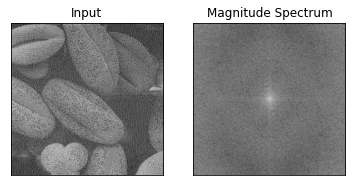

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log


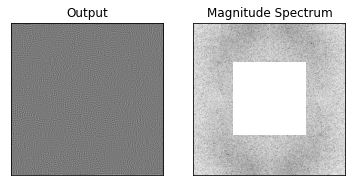

(18.577829519778575, False)

In [ ]:
detect_blur_fft(myImage)

## Fourier Transform in Numpy

In [ ]:
f = np.fft.fft2(myImage)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))
phase_spectrum = (np.angle(fshift))

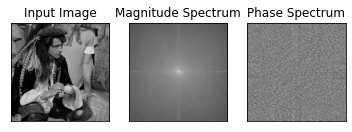

In [ ]:
plt.subplot(131),plt.imshow(myImage, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase_spectrum, cmap = 'gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


Inverse transform, with HPF to the image

In [ ]:
rows, cols = myImage.shape
crow, ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
magnitude_spectrum_hpf = 20 * np.log(np.abs(fshift))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [ ]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

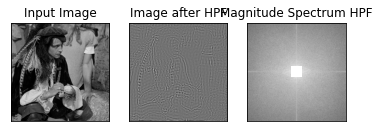

In [ ]:
plt.subplot(131),plt.imshow(myImage, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum_hpf, cmap = 'gray')
plt.title('Magnitude Spectrum HPF'), plt.xticks([]), plt.yticks([])
plt.show()

Inverse transform, with LPF to the image

In [ ]:
# Use the FFT spectrum
fshift = np.fft.fftshift(f)

In [ ]:
# create a mask with center square is 1 and remaining all zeros
size = 45
mask = np.zeros((rows,cols),np.uint8)
mask[crow-size:crow+size, ccol-size:ccol+size] = 1

# apply mask to the spectrum and do the inverse FFT
masked_fshift = fshift * mask

# Inverse shift and inverse FFT
masked_ishift = np.fft.ifftshift(masked_fshift)
img_filtered = np.fft.ifft2(masked_ishift)
img_filtered = np.real(img_filtered)

# Magnitude of filtered spectrum
spectrum_filtered = 20 * np.log(np.abs(masked_fshift))

# phase information
phase_filtered = (np.angle(masked_fshift))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


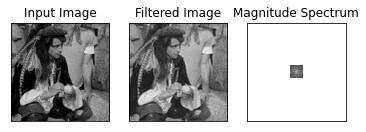

In [ ]:
plt.subplot(131),plt.imshow(myImage, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_filtered, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(spectrum_filtered, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

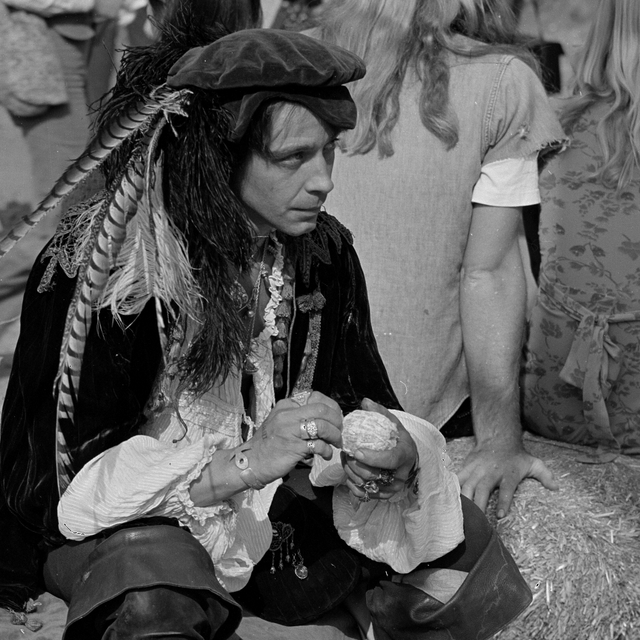

In [ ]:
cv2_imshow(myImage)

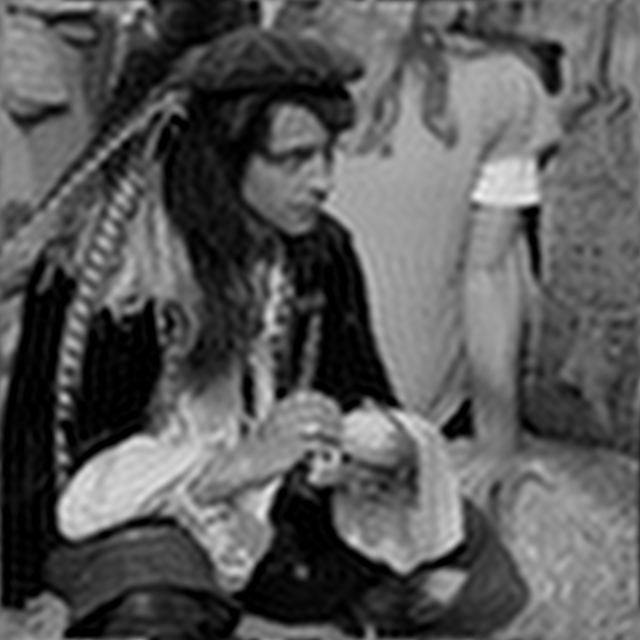

In [ ]:
cv2_imshow(img_filtered)

<function matplotlib.pyplot.show>

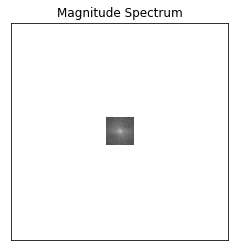

In [ ]:
plt.imshow(spectrum_filtered, cmap = "gray")
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show

<function matplotlib.pyplot.show>

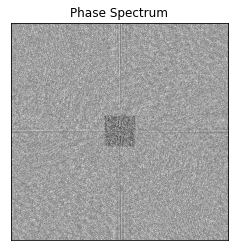

In [ ]:
plt.imshow(phase_filtered, cmap = "gray")
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])
plt.show

## Assignment

See [OpenCV Fourier Transform documentation](https://docs.opencv.org/4.x/de/dbc/tutorial_py_fourier_transform.html)

- Implement Fourier Transform on image using DFT function provided by OpenCV.
- Do High Pass Filtering on magnitude spectrum, and reconstruct the image. Draw the image and all the spectrum.
- Do Low Pass Filtering on magnitude spectrum, and reconstruct the image Draw the image and all the spectrum.
- Apply the process to the coloured image on the library.